### Neural Network for Letter Recognition (A, B, C)
Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Step 2: Create Binary Patterns for Letters A, B, and C

In [2]:
# Each letter is represented as a 5x6 (30-pixel) binary grid

A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1]
]).flatten()

# Combine into dataset
X = np.array([A, B, C])
y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])


Step 3: Define Helper Functions

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


Step 4: Initialize Neural Network Parameters

In [4]:
np.random.seed(42)

input_neurons = X.shape[1]   # 30 pixels
hidden_neurons = 8           # hidden layer
output_neurons = 3           # 3 classes (A, B, C)
lr = 0.1                     # learning rate

# Random weights
w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))


Step 5: Training (Feedforward + Backpropagation)

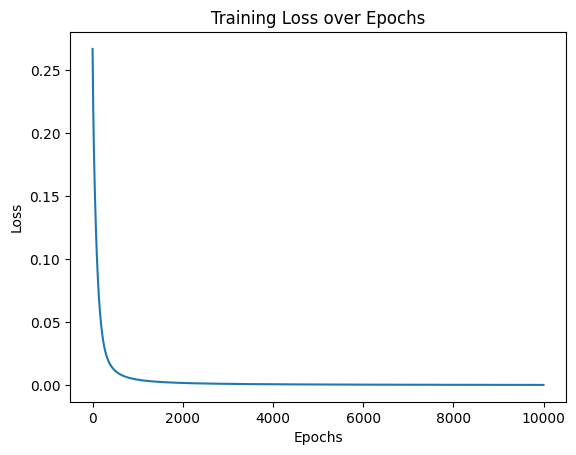

In [5]:
epochs = 10000
losses = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, w1)
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, w2)
    final_output = sigmoid(final_input)

    # Calculate error
    error = y - final_output
    loss = np.mean(np.square(error))
    losses.append(loss)

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = np.dot(d_output, w2.T) * sigmoid_derivative(hidden_output)

    # Update weights
    w2 += np.dot(hidden_output.T, d_output) * lr
    w1 += np.dot(X.T, d_hidden) * lr

# Plot loss curve
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Step 6: Test the Model

In [6]:
def predict(letter):
    hidden = sigmoid(np.dot(letter, w1))
    output = sigmoid(np.dot(hidden, w2))
    return output

letters = {'A': A, 'B': B, 'C': C}

for name, letter in letters.items():
    pred = predict(letter)
    print(f"Prediction for {name}: {pred.round(2)}")


Prediction for A: [0.98 0.01 0.02]
Prediction for B: [0.01 0.98 0.02]
Prediction for C: [0.01 0.02 0.98]


Step 7: Visualize Predictions

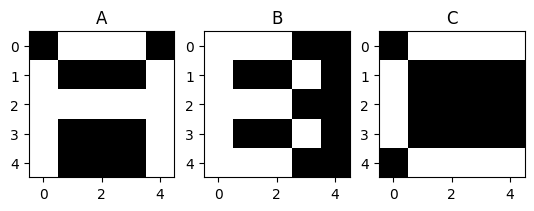

In [7]:
for i, letter in enumerate([A, B, C]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(letter.reshape(5, 5), cmap='gray')
    plt.title(['A', 'B', 'C'][i])
plt.show()


Output:

Trains a small feedforward NN on 3 letter patterns.

Displays loss curve.

Predicts probabilities for A, B, and C.

Visualizes each letter pattern